# $Assignment$ $7$

## $Aditi$ $Joshi$ - $200121022$

#### Numerical Methods for Differential Equations


To find the solution of complex differential equations, numerical methods are particularly useful.

New_Value = Old_Value + Slope × Step_Size 

This formula can be applied step by step to compute out into the future and, hence, trace out the trajectory of the
solution.

***

## Euler's Method 

We can estimate the slope at $x_{i}$ using the derivative. 

$y_{i+1}$ = $y_{i}$ + $\phi$$h$

where, $\phi$ = $f(x_{i}, y_{i})$ (derivative)



This formula is referred to as Euler’s (or the point-slope) method. A new value of y is predicted using
the slope (equal to the first derivative at the original value of x) to extrapolate linearly over the step size h.

## Midpoint Method 

Midpoint method (or the improved polygon or the modified Euler) uses Euler’s method to predict a value of y at the
midpoint of the interval. The predicted value is used to calculate a slope at the midpoint which is assumed to
represent a valid approximation of the average slope for the entire interval. This slope is then used to extrapolate
linearly from $x_{i}$ to $x_{i+1}$. 

$y_{i+\frac{1}{2}}$ = $y_{i}$ + $f(x_{i}, y_{i}) \frac{h}{2}$

$y_{i+1}$ = $y_{i}$ + $\phi h$

$\phi$ = $f(x_{i + \frac{1}{2}}, y_{i+\frac{1}{2}})$

## Heun's Method

One method to improve the estimate of the slope involves the determination of two derivatives for the interval—one at
the initial point and another at the end point. The two derivatives are then averaged to obtain an improved estimate of
the slope for the entire interval. 

$y^{o}_{i}$ = $y_{i}$ + $f(x_{i}, y_{i})$$h$

$slope_{left}$ = $f(x_{i}, y_{i})$

$slope_{right}$ = $f(x_{i}, y_{i}^{o})$

$\phi$ = $\frac{slope_{left} + slope_{right}}{2}$

$y_{i+1}$ = $y_{i}$ + $\phi h$


This approach is called Heun’s method. This method is a predictor-corrector approach.

In [65]:
#importing important libraries

import numpy as np
from math import pow
import matplotlib.pyplot as plt
import pprint

In [66]:
def f_der(x,y):
    return -2*pow(x,3) + 12*pow(x,2) - 20*x + 8.5

def f(x):
    return -0.5*pow(x,4) + 4*pow(x,3) - 10*pow(x,2) + 8.5*x + 1

In [67]:
# plotting the function

def func_plot(x0, xn):
    x = np.linspace(x0, xn, 500)
    y = np.linspace(f(x0), f(xn), 500)
    for i in range(500):
        y[i] = f(x[i])
    return x, y

In [68]:
# Euler's Method

def euler(x0, y0, xn, h):
    x = np.arange(x0, xn + h, step = h)
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    
    print("Step size = %0.2f \n" % h)
    print('X\t\tY\t\t\tSlope\t\t\tActual_Y\t\tPercent_Error\n')
    
    for i in range(1, n):
        slope = f_der(x0, y0)
        yn = y0 + h * slope               
        x[i] = x0 + h
        y[i] = yn
        y0 = yn
        x0 = x0 + h
        percent_error = abs(((f(x0) - y0) * 100) / f(x0)) 
        print('%0.4f\t\t%0.6f\t\t%0.6f\t\t%0.6f\t\t%0.6f'% (x0,y0,slope,f(x0),percent_error))

    print('\nAt X = %.4f, Y = %.4f and Percentage Error = %0.6f' %(xn,yn, percent_error))
    print("\n")
    return x, y

Euler's Method

Step size = 0.50 

X		Y			Slope			Actual_Y		Percent_Error

0.5000		5.250000		8.500000		3.218750		63.106796
1.0000		5.875000		1.250000		3.000000		95.833333
1.5000		5.125000		-1.500000		2.218750		130.985915
2.0000		4.500000		-1.250000		2.000000		125.000000
2.5000		4.750000		0.500000		2.718750		74.712644
3.0000		5.875000		2.250000		4.000000		46.875000
3.5000		7.125000		2.500000		4.718750		50.993377
4.0000		7.000000		-0.250000		3.000000		133.333333

At X = 4.0000, Y = 7.0000 and Percentage Error = 133.333333


Step size = 0.25 

X		Y			Slope			Actual_Y		Percent_Error

0.2500		3.125000		8.500000		2.560547		22.044241
0.5000		4.179688		4.218750		3.218750		29.854369
0.7500		4.492188		1.250000		3.279297		36.986301
1.0000		4.343750		-0.593750		3.000000		44.791667
1.2500		3.968750		-1.500000		2.591797		53.127355
1.5000		3.554688		-1.656250		2.218750		60.211268
1.7500		3.242188		-1.250000		1.998047		62.267840
2.0000		3.125000		-0.468750		2.000000		56.250000
2.2500		3.250000		0.5000

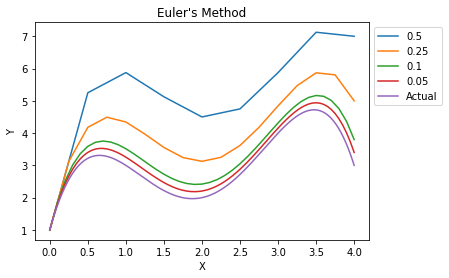

In [69]:
# Euler's Method

print("Euler's Method\n")

steps = [0.5, 0.25, 0.1, 0.05]

for step in steps:
    X, Y = euler(0, 1, 4, step)
    plt.plot(X, Y)
X, Y = func_plot(0,4)
plt.plot(X, Y)
plt.legend(["0.5", "0.25", "0.1", "0.05", "Actual"], bbox_to_anchor = (1,1))
plt.title("Euler's Method")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [70]:
# Midpoint Method

def midpoint(x0, y0, xn, h):
    x = np.arange(x0, xn + h, step = h)
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    
    print("Step size = %0.2f \n" % h)
    print('X\t\tY\t\t\tSlope\t\t\tActual_Y\t\tPercent_Error\n')
    
    for i in range(1, n):
        slope0 = f_der(x0, y0)
        ymp = y0 + slope0 * (h/2) 
        xmp = x0 + (h/2)
        slope = f_der(xmp,ymp)
        yn = y0 + h * slope
         
        x[i] = x0 + h
        y[i] = yn
        y0 = yn
        x0 = x0 + h
        percent_error = abs(((f(x0) - y0)*100)/f(x0)) 
        print('%0.4f\t\t%0.6f\t\t%0.6f\t\t%0.6f\t\t%0.6f'% (x0,y0,slope,f(x0),percent_error))

    print('\nAt X = %.4f, Y = %.4f and Percentage Error = %0.6f' %(xn,yn, percent_error))
    print("\n")
    return x, y    

Midpoint Method

Step size = 0.50 

X		Y			Slope			Actual_Y		Percent_Error

0.5000		3.109375		4.218750		3.218750		3.398058
1.0000		2.812500		-0.593750		3.000000		6.250000
1.5000		1.984375		-1.656250		2.218750		10.563380
2.0000		1.750000		-0.468750		2.000000		12.500000
2.5000		2.484375		1.468750		2.718750		8.620690
3.0000		3.812500		2.656250		4.000000		4.687500
3.5000		4.609375		1.593750		4.718750		2.317881
4.0000		3.000000		-3.218750		3.000000		0.000000

At X = 4.0000, Y = 3.0000 and Percentage Error = 0.000000


Step size = 0.25 

X		Y			Slope			Actual_Y		Percent_Error

0.2500		2.545898		6.183594		2.560547		0.572082
0.5000		3.191406		2.582031		3.218750		0.849515
0.7500		3.241211		0.199219		3.279297		1.161406
1.0000		2.953125		-1.152344		3.000000		1.562500
1.2500		2.538086		-1.660156		2.591797		2.072344
1.5000		2.160156		-1.511719		2.218750		2.640845
1.7500		1.936523		-0.894531		1.998047		3.079179
2.0000		1.937500		0.003906		2.000000		3.125000
2.2500		2.186523		0.996094		2.248047		2.73

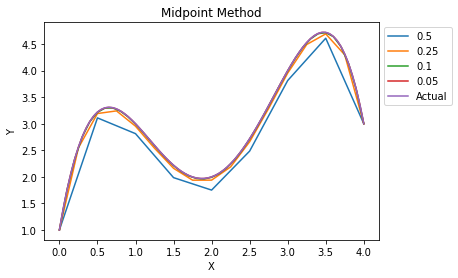

In [71]:
# Midpoint Method

print("Midpoint Method\n")

steps = [0.5, 0.25, 0.1, 0.05]

for step in steps:
    X, Y = midpoint(0, 1, 4, step)
    plt.plot(X, Y)
X, Y = func_plot(0,4)
plt.plot(X, Y)
plt.legend(["0.5", "0.25", "0.1", "0.05", "Actual"], bbox_to_anchor = (1,1))
plt.title("Midpoint Method")
plt.xlabel("X")
plt.ylabel("Y")
plt.show() 

In [76]:
# Code for Heun's Method

def heuns(x0, y0, xn, h):
    x = np.arange(x0, xn + h, step = h)
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    
    print("Step size = %0.2f \n" % h)
    print('X\t\tY\t\t\tSlope\t\t\tActual_Y\t\tPercent_Error\n')
    
    for i in range(1, n):
        slope_left = f_der(x0, y0)
        yold = y0 + h * slope_left
        
        slope_right = f_der(x0 + h,yold)
        slope = (slope_left + slope_right)/2
        
        yn = y0 + h * slope   
        x[i] = x0 + h
        y[i] = yn
        y0 = yn
        x0 = x0 + h
        percent_error = abs(((f(x0) - y0) * 100) / f(x0)) 
        print('%0.4f\t\t%0.6f\t\t%0.6f\t\t%0.6f\t\t%0.6f'% (x0,y0,slope,f(x0),percent_error))

    print('\nAt X = %.4f, Y = %.4f and Percentage Error = %0.6f' %(xn,yn, percent_error))
    print("\n")
    return x, y

Heun's Method
Step size = 0.50 

X		Y			Slope			Actual_Y		Percent_Error

0.5000		3.437500		4.875000		3.218750		6.796117
1.0000		3.375000		-0.125000		3.000000		12.500000
1.5000		2.687500		-1.375000		2.218750		21.126761
2.0000		2.500000		-0.375000		2.000000		25.000000
2.5000		3.187500		1.375000		2.718750		17.241379
3.0000		4.375000		2.375000		4.000000		9.375000
3.5000		4.937500		1.125000		4.718750		4.635762
4.0000		3.000000		-3.875000		3.000000		0.000000

At X = 4.0000, Y = 3.0000 and Percentage Error = 0.000000


Step size = 0.25 

X		Y			Slope			Actual_Y		Percent_Error

0.2500		2.589844		6.359375		2.560547		1.144165
0.5000		3.273438		2.734375		3.218750		1.699029
0.7500		3.355469		0.328125		3.279297		2.322811
1.0000		3.093750		-1.046875		3.000000		3.125000
1.2500		2.699219		-1.578125		2.591797		4.144687
1.5000		2.335938		-1.453125		2.218750		5.281690
1.7500		2.121094		-0.859375		1.998047		6.158358
2.0000		2.125000		0.015625		2.000000		6.250000
2.2500		2.371094		0.984375		2.248047		5.473

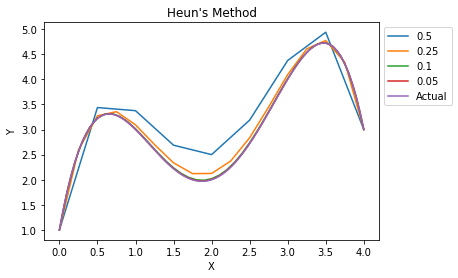

In [77]:
# Heun's Method

print("Heun's Method")

steps = [0.5, 0.25, 0.1, 0.05]

for step in steps:
    X, Y = heuns(0, 1, 4, step)
    plt.plot(X, Y)
X, Y = func_plot(0,4)
plt.plot(X, Y)
plt.legend(["0.5", "0.25", "0.1", "0.05", "Actual"], bbox_to_anchor = (1,1))
plt.title("Heun's Method")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Plotting all the three methods with step size 0.05 and comparing those with the actual result : 

Euler's Method
Step size = 0.05 

X		Y			Slope			Actual_Y		Percent_Error

0.0500		1.425000		8.500000		1.400497		1.749602
0.1000		1.801488		7.529750		1.753950		2.710311
0.1500		2.132388		6.618000		2.063247		3.351059
0.2000		2.420550		5.763250		2.331200		3.832790
0.2500		2.668750		4.964000		2.560547		4.225782
0.3000		2.879688		4.218750		2.753950		4.565715
0.3500		3.055988		3.526000		2.913997		4.872710
0.4000		3.200200		2.884250		3.043200		5.159043
0.4500		3.314800		2.292000		3.143997		5.432675
0.5000		3.402188		1.747750		3.218750		5.699029
0.5500		3.464688		1.250000		3.269747		5.961949
0.6000		3.504550		0.797250		3.299200		6.224236
0.6500		3.523950		0.388000		3.309247		6.487975
0.7000		3.524987		0.020750		3.301950		6.754721
0.7500		3.509688		-0.306000		3.279297		7.025610
0.8000		3.480000		-0.593750		3.243200		7.301431
0.8500		3.437800		-0.844000		3.195497		7.582643
0.9000		3.384887		-1.058250		3.137950		7.869389
0.9500		3.322987		-1.238000		3.072247		8.161474
1.0000		3.253750		-1.384750	

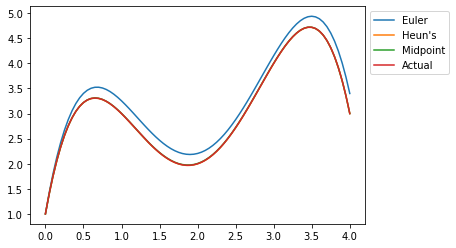

In [78]:
# Comparing the three methods

print("Euler's Method")
X_euler, Y_euler = euler(0, 1, 4, 0.05)
plt.plot(X_euler, Y_euler)

print("Midpoint Method")
X_midpoint, Y_midpoint = midpoint(0, 1, 4, 0.05)
plt.plot(X_midpoint, Y_midpoint)

print("Heun's Method")
X_heuns, Y_heuns = heuns(0, 1, 4, 0.05)
plt.plot(X_heuns, Y_heuns)

X, Y = func_plot(0, 4)
plt.plot(X, Y)

plt.legend(["Euler", "Heun's", "Midpoint", "Actual"], bbox_to_anchor = (1,1))
plt.show() 

We can see that Heun's and Midpoint method with step size 0.05 are a good approximation to the actual curve. 

We also observe that Midpoint Method works the best in this case.